# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

# Análisis de planes de telefonía: ¿cuál es el más rentable?

# Contenido
* [Introducción](#intro)
* [Objetivos](#objetivos)
* [Etapas](#etapas)

# Introducción

En este proyecto analizaremos datos de la empresa de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago: Surf y Ultimate. El trabajo consiste en determinar cuál de estos planes genera más ingresos a la empresa. La(s) hipótesis específica(s) será(n) presentada(s) en los cuadros siguientes y para el desarrollo de este proyecto aplicaremos diversas técnicas utilizadas a lo largo del curso, como el preprocesamiento, análisis exploratorio y análisis estadístico de los datos. Cada espacio de código cuenta con sus respectivos comentarios para un mejor entendimiento del desarrollo del proyecto.

# Objetivos

Nuestras hipótesis específicas a probar serán las siguientes:
* Existe una diferencia entre el ingreso promedio de los ususarios de las tarifas Ultimate y Surf.
* Existe una diferencia entre el ingreso promedio de los usuario en el área de estados Nueva York-Nueva Jersey al de los usuarios de otras regiones.

# Etapas del análisis

En este proyecto, seguiremos este esquema propuesto de manera general para ordenar el proceso de análisis. Se aclara que, debido a que no se tiene mucha información respecto a la calidad de los datos ni contacto con el área relacionada, el tratamiento de datos y análisis exploratorio se realizará usando supuestos razonables desde el punto de vista del analista. El esquema es:
1. Descripción de los datos
2. Preprocesamiento de los datos
3. Análisis exploratorio de datos
4. Prueba de las hipótesis
5. Conclusiones finales

# Inicialización: descripción de los datos

**Carga de librerías necesarias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Cargar todas las librerías

## Cargar los datos

En este caso, se nos proporcionan cinco diferentes datasets con la información necesaria para realizar el proceso analítico. Cada DataFrame tiene un nombre relacionado a su tabla de origen de manera explícita.

In [2]:

try:
    users = pd.read_csv("megaline_users.csv")
    calls = pd.read_csv("megaline_calls.csv")
    messages = pd.read_csv("megaline_messages.csv")
    internet = pd.read_csv("megaline_internet.csv")
    plans = pd.read_csv("megaline_plans.csv")
except:
    users = pd.read_csv("/datasets/megaline_users.csv")
    calls = pd.read_csv("/datasets/megaline_calls.csv")
    messages = pd.read_csv("/datasets/megaline_messages.csv")
    internet = pd.read_csv("/datasets/megaline_internet.csv")
    plans = pd.read_csv("/datasets/megaline_plans.csv")
# Carga los archivos de datos en diferentes DataFrames

## Exploración de datos iniciales

Para mantener el desarrollo ordenado, realizaremos cada paso del preprocesamiento para cada tabla, de la forma que sigue:

**Exploración de la tabla `users`**

Dentro de esta tabla, contamos con la siguiente información según su descripción:
* `user_id`: identificador único del usuario.
* `first_name`: nombre del usuario.
* `last_name`: apellido del usuario.
* `age`: edad del usuario en años.
* `reg_date`: fecha de suscripción (dd, mm, aa).
* `churn_date`: fecha en que el usuario dejó de usar el servicio (si es ausente, la tarifa se estaba usando al momento de recuperar los datos).
* `city`: ciudad de residencia del usuario.
* `plan`: nombre de la tarifa.

Ahora obtendremos su información:

In [3]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [4]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Detallando por columnas, tenemos:
* `user_id` no parece mostrar problemas.
* `first_name` no parece mostrar problemas.
* `last_name` no parece tener problemas.
* `age` no parece tener problemas.
* `city` no parece mostrar problemas.
* `reg_date` tiene un formato inadecuado para su análisis. Se necesita cambiar al formato fecha.
* `plan` no parece tener problemas.
* `churn_date` tiene gran cantidad de valores ausentes, pero recordemos que esta columna solo tiene información de la fecha donde las personas que terminaron sus planes. Es decir, si la mayoría de personas aún siguen usando sus planes (algo razonable), esperaríamos tener pocos registros no nulos. En todo caso, al tratarse de fechas, también requeriría un cambio de formato.

Ya que parece que nuestras columnas numéricas no parecen tener problemas, necesitamos más información sobre las columnas categóricas para continuar con el análisis:

In [6]:
users_categ = users[['first_name', 'last_name', 'city', 'plan']]
for column in users_categ:
    try:
        print(f"Valores únicos de la columna '{column}':")
        print(users_categ[column].unique())
        print()
    except:
        print("Error al mostrar valores únicos de users_categ")

Valores únicos de la columna 'first_name':
['Anamaria' 'Mickey' 'Carlee' 'Reynaldo' 'Leonila' 'Livia' 'Jesusa'
 'Eusebio' 'Emely' 'Gerry' 'Wilber' 'Halina' 'Jonelle' 'Nicolas' 'Edmundo'
 'Beata' 'Jann' 'Boris' 'Dennis' 'Shizue' 'Rutha' 'Ricarda' 'Bo' 'Jack'
 'Yuki' 'Jess' 'Meggan' 'Georgeanna' 'Jefferey' 'Franklyn' 'Chase' 'Lane'
 'Delila' 'Latoyia' 'Jc' 'Jeff' 'Myron' 'Reena' 'Olympia' 'Flo' 'Paris'
 'Drucilla' 'Clementina' 'Carlos' 'Devora' 'Barney' 'Yuk' 'Linwood'
 'Loise' 'Jone' 'Rosario' 'Edmond' 'Piper' 'Denis' 'Patrick' 'Theo'
 'Reinaldo' 'Avril' 'Denisse' 'Maryam' 'Kristeen' 'Larhonda' 'Gerardo'
 'Sherlyn' 'Ariel' 'Robt' 'Marcel' 'Dino' 'Jacelyn' 'Isa' 'Seymour'
 'Grady' 'Particia' 'Salena' 'Ronny' 'Chau' 'Earnest' 'Brian' 'Neal'
 'Grayce' 'Dominic' 'Lyndia' 'Wiley' 'Ignacio' 'Adena' 'Lenard' 'Malena'
 'Brock' 'Taylor' 'Taren' 'Karima' 'Walter' 'Lilliam' 'Song' 'Deandre'
 'Collin' 'Shavon' 'Aaron' 'Sage' 'Marquitta' 'Moises' 'Thurman' 'Micheal'
 'Eddy' 'Porfirio' 'Anderson' 'Bo

In [7]:
for column in users_categ:
    try:
        print(f"Distribución de valores de la columna '{column}':")
        print(users_categ[column].value_counts(dropna=False, normalize=True))
        print()
    except:
        print("Error al mostrar la distribución de users_categ")

Distribución de valores de la columna 'first_name':
Leonila     0.006
Jasper      0.006
Seymour     0.006
Lucius      0.004
Errol       0.004
            ...  
Olin        0.002
Hai         0.002
Shay        0.002
Rebbecca    0.002
Shena       0.002
Name: first_name, Length: 458, dtype: float64

Distribución de valores de la columna 'last_name':
David        0.006
Morrison     0.006
Grimes       0.006
Kelley       0.006
Velazquez    0.006
             ...  
Cain         0.002
Robinson     0.002
Adkins       0.002
Bean         0.002
Dickson      0.002
Name: last_name, Length: 399, dtype: float64

Distribución de valores de la columna 'city':
New York-Newark-Jersey City, NY-NJ-PA MSA          0.160
Los Angeles-Long Beach-Anaheim, CA MSA             0.058
Dallas-Fort Worth-Arlington, TX MSA                0.042
Chicago-Naperville-Elgin, IL-IN-WI MSA             0.038
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    0.034
                                                   ...  
Raleigh-C

El restante detalle que nos faltaba acerca de las columnas categóricas nos muestra que aparentemente este dataset no parece tener más problemas aparte de los ya mencionados. Una mención aparte para los nombres de la ciudades, cuyos nombres explícitos necesitan ser resumidos de alguna forma. Por ahora, continuamos con la siguiente tabla.

**Exploración inicial de la tabla `calls`**

Esta tabla presenta los siguientes datos según su descripción:
* `id`: identificador único de la llamada.
* `call_date`: fecha de la llamada.
* `duration`: duración de la llamada en minutos.
* `user_id`: identificador del usuario que realiza la llamada.

Ahora obtendremos la información de esta tabla:

In [8]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [9]:
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


En esta tabla, tenemos lo siguiente:
* `id` no parece mostrar problemas.
* `user_id` no parece mostrar problemas.
* `call_date` necesita un cambio de formato a fechas para un mejor análisis.
* `duration` no parece tener problemas.

En este caso, no tenemos más tipos de datos por explorar y no parecen tener problemas. Solo un pequeño detalle en la descripción nos alerta sobre las llamadas de 0.0 de duración. Por ahora, continuamos con la siguiente tabla.

**Exploración inicial de la tabla `messages`**

Este dataset tiene la siguiente información:
* `id`: identificador único del SMS.
* `message_date`: fecha del SMS.
* `user_id`: identificador del usuario que manda el SMS.

A continuación, obtenemos los principales datos de la tabla:

In [11]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [12]:
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


En esta tabla notamos lo siguiente:
* `id` no parece mostrar problemas.
* `message_date` necesita un cambio de formato a fecha para que sea coherente y útil.
* `user_id` no parece tener problemas, excepto el hecho de que no aparecen los usuarios con código 1498 y 1499. Una hipótesis al respecto es que estos usuarios no usaron los SMS para comunicarse en este periodo de tiempo.

Ya que esta tabla no aparenta tener más problemas, continuamos con la siguiente.

**Exploración inicial de la tabla `internet`**

En esta tabla tenemos la siguiente información:
* `id`: identificador único de la sesión.
* `mb_used`: volumen de datos gastados durante la sesión (en MB).
* `session_date`: fecha de la sesión web.
* `user_id`: identificador del usuario.

Continuamos con explorar los datos de la tabla:

In [14]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [15]:
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


En este DataFrame, tenemos:
* `id` no parece tener problemas.
* `user_id` no parece mostrar problemas.
* `session_date` podría requerir un cambio de formato a fecha para mejorar el análisis.
* `mb_used` no parece mostrar problemas, exceptuando por la unidad de medida que podría requerir un cambio y ajuste para estar en línea con las tarifas vigentes de la empresa.

Dado que no existen más columnas a analizar ni problemas aparentes, continuamos con el último set de datos.

**Exploración inicial de la columna `plans`**

En este dataset, tenemos la siguiente información:
* `plan_name`: nombre de la tarifa.
* `usd_monthly_fee`: pago mensual en dólares estadounidenses.
* `minutes_included`: minutos incluidos al mes.
* `messages_included`: SMS incluidos al mes.
* `mb_per_month_included`: datos incluidos al mes (en MB).
* `usd_per_minute`: precio por minuto tras exceder los límites del paquete.
* `usd_per_message`: precio por SMS tras exceder los límites del paquete.
* `usd_per_gb`: precio por gigabyte de los datos extra tras exceder los límites del paquete.

En base a esta información, exploramos la tabla:

In [17]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [18]:
plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [19]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


No es necesario hacer un análisis por columna debido a que esta tabla tiene información sobre los planes y lo que integran. No existen datos faltantes, y se podría necesitar una corrección para los MB descritos en la tabla.

Sobre los planes, esta es su descripción:

**Surf**
<br>Pago mensual: 20$
<br>500 minutos al mes, 50 SMS y 15 GB de datos
<br>Si se exceden los límites del paquete:
<br>1 minuto: 3 centavos
<br>1 SMS: 3 centavos
<br>1 GB de datos: 10$

**Ultimate**
<br>Pago mensual: 70$
<br>3000 minutos al mes, 1000 SMS y 30 GB de datos
<br>Si se exceden los límites del paquete:
<br>1 minuto: 1 centavo
<br>1 SMS: 1 centavo
<br>1 GB de datos: 7$

Ya que no precisamos de realizar más exploraciones por ahora, continuaremos con el preprocesamiento de los datos, sin antes dar las conclusiones del apartado.

## Conclusiones del apartado

De todos los DataFrames analizados, tenemos las siguientes conclusiones:

Nuestras tablas, en general, no cuentan con grandes problemas relacionados a datos ausentes. Estas tablas tienen la información necesaria para poder realizar el análisis requerido. 
* La tabla `users` solo requiere corregir el formato hacia fechas, posiblemente también se necesite obtener información resumida sobre las ciudades, y tratar los valores ausentes relacionados a los clientes que aún tienen un plan activo.
* La tabla `calls` también requiere la correción de fechas, una revisión de las llamadas de 0 de duración y convertir la duración de las llamadas hacia la forma en que el tarifario de la empresa funciona.
* La tabla `messages` solo precisa de corregir el formato de fechas.
* La tabla `internet` requiere corregir el formato de fechas y la unidad de medida de MB hacia GB.
* La tabla `plans` solo requiere cambios en la unidad de medida de MB hacia GB.

# Preprocesamiento de datos

En este apartado continuaremos con el esquema por tablas, realizando en tratamiento necesario para cada caso en base a las conclusiones del último apartado. Empezaremos con la tabla `users`.

## Corregir y enriquecer datos de `users`

Recordemos que esta columna requería de corregir el formato de fechas de su columna `reg_date` y `churn_date`, a la vez que esta última presentaba valores ausentes de los que sabemos su naturaleza de origen. Empezaremos con `reg_date`:

In [20]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['reg_date'].head()

0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
Name: reg_date, dtype: datetime64[ns]

Una vez comprobado que la transformación fue efectiva, continuamos con `churn_date`:

In [21]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['churn_date'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: churn_date, dtype: datetime64[ns]

Recordamos también que esta columna en su mayor parte cuenta con valores ausentes debido a que solo se registra para casos en donde los cientes dejaron de usar su respectivo plan. Por ahora no requerimos informacióna cerca de esta columna, así que la dejaremos con esa información. 

Contaremos si esta columna cuenta con duplicados explícitos como último paso:

In [22]:
users.duplicated().sum()

0

Por ahora, corregimos las columnas y continuaremos con la siguiente tabla.

## Corregir y enriquecer datos de `calls`

Recordemos que esta tabla requería corregir el formato de fechas de su columna `call_date`. Ese será el primer cambio que realizaremos a continuación:

In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['call_date'].head()

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]

Ahora que este problema está corregido, otro problema presente era que teníamos llamadas de 0.0 minutos de duración, de los cuales se sospecha que se tratan de llamadas perdidas. Este tipo de llamadas debería tener una frecuencia considerable si siguiera ese comportamiento. En ese caso, llamaremos a la columna correspondiente en porcentajes para obtener la frecuencia:

In [24]:
calls['duration'].value_counts(normalize=True).head()

0.00    0.194823
4.02    0.000741
8.37    0.000741
3.91    0.000733
4.30    0.000726
Name: duration, dtype: float64

Tal como se sospechaba, un 19 % de estos datos corresponden a ese tipo de llamadas de duración anormal. Si analizamos un poco, este tipo de llamadas no se suman al tarifario de planes ni a los costos extra de la empresa, es decir, no se traduce en ingresos reales en la empresa. Por tanto, se trata de información no relevante para el análisis. Tener en cuenta estos datos en adelante podría sesgar o distorsionar nuestas conclusiones, indicadores y coeficientes que podríamos obtener en el futuro. Debido a eso, concluimos que continuaremos nuestro análisis prescindiendo de estas filas donde la duración de la llamada sea igual a 0.0 minutos.

In [25]:
calls = calls.query("duration != 0").reset_index()
calls['duration'].value_counts(normalize=True).head()

8.37    0.000920
4.02    0.000920
3.91    0.000911
7.61    0.000902
4.30    0.000902
Name: duration, dtype: float64

Podemos ver que el problema está solucionado. El siguiente problema a solucionar es que recordemos que Megaline tiene un tarifario que indica que las llamadas individuales se redondean hacia arriba: un segundo ya se redondea hacia un minuto. Generaremos esta información nueva usando el método "ceil()" y agregando una nueva columna a esta tabla:

In [26]:
calls['duration_rounded'] = calls['duration'].apply(np.ceil).astype('int')
calls.head()

,index,id,user_id,call_date,duration,duration_rounded
0,0,1000_93,1000,2018-12-27,8.52,9
1,1,1000_145,1000,2018-12-27,13.66,14
2,2,1000_247,1000,2018-12-27,14.48,15
3,3,1000_309,1000,2018-12-28,5.76,6
4,4,1000_380,1000,2018-12-30,4.22,5


Finalizado, también debemos tener en cuenta que se realizarán agrupaciones y resúmenes de información por meses. Entonces sería conveniente tener la columna correspondiente al mes que se podría extraer de la columna `call_date`:

In [27]:
calls['call_month'] = calls['call_date'].dt.month_name()
calls.head()

,index,id,user_id,call_date,duration,duration_rounded,call_month
0,0,1000_93,1000,2018-12-27,8.52,9,December
1,1,1000_145,1000,2018-12-27,13.66,14,December
2,2,1000_247,1000,2018-12-27,14.48,15,December
3,3,1000_309,1000,2018-12-28,5.76,6,December
4,4,1000_380,1000,2018-12-30,4.22,5,December


Finalmente, veremos si existen filas duplicadas en este dataset:

In [28]:
calls.duplicated().sum()

0

Ahora la información de esta tabla está corregida y pasaremos a la siguiente.

## Corregir y enriquecer datos de `messages`

En las conclusiones mencionamos que esta tabla solo necesitaba corregir la columna `message_date` hacia el formato de fecha:

In [29]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['message_date'].head()

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: message_date, dtype: datetime64[ns]

Una vez realizado, al igual que en la tabla anterior, es posible que necesitemos información de esta tabla en base a los meses. Obtendremos esta información agregando una nueva columna y extrayendo el mes correspondiente a ella:

In [30]:
messages['message_month'] = messages['message_date'].dt.month_name()
messages.head()

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


Finalmente, comprobaremos si este DataFrame contiene filas duplicadas:

In [31]:
messages.duplicated().sum()

0

Ya que esta tabla está solucionada, seguimos con la próxima.

## Corregir y enriquecer datos de ``internet``

Esta tabla también requería cambiar formatos de fecha de su columna ``session_date``:

In [32]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['session_date'].head()

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
Name: session_date, dtype: datetime64[ns]

Igual que en los anteriores casos, será necesario extraer la columna referida a los meses:

In [33]:
internet['internet_month'] = internet['session_date'].dt.month_name()
internet.head()

,id,user_id,session_date,mb_used,internet_month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December


En una situación similar al de las llamadas, notamos que existen valores de 0.0 MB usados. Este error pueden deberse a errores de conexión o sesiones inesperadas. En cualquier caso, es información que no será necesaria en el análisis, ya que no se traduce en ingresos para la empresa, pero probablemente sí en problemas al momento de analizar y extraer información de los datos:

In [34]:
internet['mb_used'].value_counts(normalize=True).head()

0.00      0.131142
435.77    0.000076
414.46    0.000076
423.06    0.000067
417.46    0.000067
Name: mb_used, dtype: float64

Como era de esperarse, se trata de un valor frecuente, con un 13 % de incidencia. Debido a lo explicado líneas arriba, prescindiremos de estas columnas y solo nos quedaremos con un DataFrame más adecuado a las hipótesis que queremos probar:

In [35]:
internet = internet.query('mb_used != 0').reset_index()
internet['mb_used'].value_counts(normalize=True).head()

414.46    0.000088
435.77    0.000088
417.46    0.000077
131.28    0.000077
313.79    0.000077
Name: mb_used, dtype: float64

En este DataFrame también se necesitaba tomar en cuenta el tarifario de operaciones de Megaline, donde se usan GB para el conteo de internet usado, mientras que en la tabla tenemos la información en MB. Para estandarizar estas unidades de medida, usaremos la conversión: 1 GB = 1024 MB. Crearemos una nueva columna en estas unidades para facilitar los siguientes procesos:

In [36]:
internet['gb_used'] = internet['mb_used'] / 1024 
internet.head()

,index,id,user_id,session_date,mb_used,internet_month,gb_used
0,0,1000_13,1000,2018-12-29,89.86,December,0.087754
1,2,1000_379,1000,2018-12-28,660.40,December,0.644922
2,3,1000_413,1000,2018-12-26,270.99,December,0.264639
3,4,1000_442,1000,2018-12-27,880.22,December,0.859590
4,5,1001_0,1001,2018-08-24,284.68,August,0.278008


Lo restante es verificar si existen duplicados explícitos en esta tabla:

In [37]:
internet.duplicated().sum()

0

Nos queda una tabla restante por preprocesar.

## Corregir y enriquecer datos de ``plans``

Esta columna no requería más tratamiento que la transformación de sus unidades de medida de manera análoga al de la última tabla de ``internet``. Para esto, actualizaremos los datos de la columna utilizando el mismo factor de conversión (1 GB = 1024 MB) y las convertiremos a enteros para comparar con los redondeos:

In [38]:
plans['mb_per_month_included'] = (plans['mb_per_month_included'] / 1024).astype('int')  

Ahora tendremos que actualizar el nombre de la columna, ya que las unidades de medida han cambiado hacia GB y mostraremos los resultados:

In [39]:
plans = plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'})
plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


Esta última demostración de la tabla nos recuerda cómo funciona el tarifario de Megaline en sus dos planes. Ya que logramos tener los datos listos, extraeremos aún más informacíon agrupando filas y tablas para obtener nuestro DataFrame final. 

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario por periodo para poder tener solo un registro por usuario por periodo. Esto facilitará mucho su posterior análisis.]

Como habíamos anticipado, tenemos que agrupar datos en base a los lineamientos del tarifario, a nivel de usuario y por mes. Empezaremos con la tabla ``calls`` y el número de llamadas y minutos al mes por usuario.

**Número de llamadas y minutos por usuario al mes**

De la tabla ``calls`` crearemos una nueva tabla dinámica que resuma estos datos. Llamaremos a esta tabla ``calls_by_month``. Usaremos el método "pivot_table", sumando y contando sus valores:

In [40]:
calls_by_month = calls.pivot_table(index=['user_id', 'call_month'], values='duration_rounded', aggfunc=['sum', 'count']).reset_index()
calls_by_month.columns = ['user_id', 'month', 'min_by_month', 'calls_by_month']
calls_by_month.head()

,user_id,month,min_by_month,calls_by_month
0,1000,December,124,16
1,1001,August,182,22
2,1001,December,412,46
3,1001,November,426,49
4,1001,October,393,47


**Número de mensajes enviados por usuario al mes**

De forma análoga, de la tabla ``messages`` crearemos una tabla dinámica que resuma los mensajes por usuario al mes. Esta tabla se llamará ``messages_by_month``:

In [41]:
messages_by_month = messages.pivot_table(index=['user_id', 'message_month'], values='id', aggfunc='count').reset_index()
messages_by_month.columns = ['user_id', 'month', 'messages_by_month']
messages_by_month.head()

,user_id,month,messages_by_month
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


**Tráfico de internet usado por usuario al mes**

En este caso, usaremos la tabla ``internet`` para obtener información que resuma el consumo de internet por usuario al mes:

In [42]:
internet_by_month = internet.pivot_table(index=['user_id', 'internet_month'], values='gb_used', aggfunc='sum').reset_index()
internet_by_month.head()

,user_id,internet_month,gb_used
0,1000,December,1.856904
1,1001,August,6.756982
2,1001,December,18.915215
3,1001,November,18.070605
4,1001,October,21.807119


Ahora tenemos que aplicar los lineamientos del tarifario de Megaline: se redondea el consumo mensual en GB, si consumió 1025 MB, se le cobrará por 2 GB. Recordemos que ya habíamos cambiado las unidades de medida para facilitar este proceso de redondeo hacia arriba:

In [43]:
internet_by_month['gb_used'] = internet_by_month['gb_used'].apply(np.ceil).astype('int')
internet_by_month.columns = ['user_id', 'month', 'gb_used']
internet_by_month.head()

,user_id,month,gb_used
0,1000,December,2
1,1001,August,7
2,1001,December,19
3,1001,November,19
4,1001,October,22


In [44]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.

Una vez realizado este proceso de unificar datos por usuario al mes para cada tipo de uso de telefonía móvil, ahora tendremos que unificar estas tablas. Para este proceso, usaremos el método "merge" de Pandas porque hicimos un "reset_index" (no podemos usar "join") y usaremos el parámetro "outer" de la unión para preservar todos los datos: es posible que, el caso más probable, existan personas que usen mucho más las llamadas e internet y casi no los mensajes de texto, por ejemplo; sin embargo, eso no los excluiría de la posibilidad de exceder su plan mensual. 

Ya que tenemos tres tablas, haremos el proceso en pares:

In [45]:
mobile_final = calls_by_month.merge(messages_by_month, on=['user_id', 'month'] , how='outer')
mobile_final.head(10)

,user_id,month,min_by_month,calls_by_month,messages_by_month
0,1000,December,124.0,16.0,11.0
1,1001,August,182.0,22.0,30.0
2,1001,December,412.0,46.0,44.0
3,1001,November,426.0,49.0,36.0
4,1001,October,393.0,47.0,53.0
5,1001,September,315.0,38.0,44.0
6,1002,December,384.0,38.0,41.0
7,1002,November,386.0,48.0,32.0
8,1002,October,59.0,8.0,15.0
9,1003,December,1104.0,118.0,50.0


Y otra unión consecutiva:

In [46]:
mobile_final = mobile_final.merge(internet_by_month, on=['user_id', 'month'], how='outer')
mobile_final

,user_id,month,min_by_month,calls_by_month,messages_by_month,gb_used
0,1000,December,124.0,16.0,11.0,2.0
1,1001,August,182.0,22.0,30.0,7.0
2,1001,December,412.0,46.0,44.0,19.0
3,1001,November,426.0,49.0,36.0,19.0
4,1001,October,393.0,47.0,53.0,22.0
...,...,...,...,...,...,...
2288,1407,November,NaN,NaN,1.0,1.0
2289,1482,October,NaN,NaN,2.0,NaN
2290,1094,October,NaN,NaN,NaN,2.0
2291,1108,December,NaN,NaN,NaN,1.0


In [47]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes


Por último, también necesitaremos unir nuestra tabla principal que contiene datos de los usuarios y así tener la información completa:

In [48]:
megaline_complete = users.merge(mobile_final, on='user_id', how='outer')
megaline_complete

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,min_by_month,calls_by_month,messages_by_month,gb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,December,124.0,16.0,11.0,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,August,182.0,22.0,30.0,7.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,December,412.0,46.0,44.0,19.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,November,426.0,49.0,36.0,19.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,October,393.0,47.0,53.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,September,363.0,39.0,NaN,23.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,December,496.0,56.0,NaN,22.0
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,November,308.0,39.0,NaN,17.0
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,October,385.0,41.0,NaN,20.0


Notamos que existe una diferencia en el total de filas entre nuestro dataset ``mobile_final`` y ``megaline_complete``. Profundizaremos al respecto:

In [49]:
len(mobile_final['user_id'].unique())

490

In [50]:
len(megaline_complete['user_id'].unique())

500

En efecto, existen 10 usuarios que no hacen uso de los planes. Para averiguar de qué tipo de clientes se tratan, haremos un "query" con la condición específica para hallar a estos clientes y guardaremos esta información en un DataFrame aparte:

In [51]:
users_no_mobile = megaline_complete.query("user_id not in @mobile_final.user_id")
users_no_mobile

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,min_by_month,calls_by_month,messages_by_month,gb_used
86,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaT,NaN,NaN,NaN,NaN,NaN
612,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,NaN,NaN,NaN,NaN,NaN
682,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaT,NaN,NaN,NaN,NaN,NaN
1285,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,NaN,NaN,NaN,NaN,NaN
1297,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT,NaN,NaN,NaN,NaN,NaN
1418,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaT,NaN,NaN,NaN,NaN,NaN
1466,1319,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT,NaN,NaN,NaN,NaN,NaN
1762,1378,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaT,NaN,NaN,NaN,NaN,NaN
2139,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaT,NaN,NaN,NaN,NaN,NaN
2189,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaT,NaN,NaN,NaN,NaN,NaN


Parece que solo dos de estas personas han registrado su renuncia al contrato de su plan respectivo (``churn_date``), mientras que los demás pareciera que siguen afiliados a su respectivo plan. Esto es extraño, pero puede deberse a muchos factores como clientes muy nuevos en el registro, clientes que están suspendidos, etc. Por ahora, supondremos que los clientes activos han pagado sus respectivos planes, mientras que prescindiremos de los que ya dejaron de usar el servicio (dos filas).

In [52]:
megaline_complete = megaline_complete.drop([612, 1285]).reset_index(drop=True)
megaline_complete

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,min_by_month,calls_by_month,messages_by_month,gb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,December,124.0,16.0,11.0,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,August,182.0,22.0,30.0,7.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,December,412.0,46.0,44.0,19.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,November,426.0,49.0,36.0,19.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,October,393.0,47.0,53.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,September,363.0,39.0,NaN,23.0
2297,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,December,496.0,56.0,NaN,22.0
2298,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,November,308.0,39.0,NaN,17.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,October,385.0,41.0,NaN,20.0


**Valores ausentes en ``megaline_complete``**

Tal como sucedió en el caso anterior, tenemos bastante certeza de que no todos los usuarios usaron algún servicio de telecomunicaciones (merge con "outer"). Para comprobarlo, mostraremos el número de usuarios de cada tabla dinámica generada:

In [53]:
print(f"Usuarios en la tabla calls: {len(calls['user_id'].unique())}")
print(f"Usuarios en la tabla messages: {len(messages['user_id'].unique())}")
print(f"Usuarios en la tabla internet: {len(internet['user_id'].unique())}")

Usuarios en la tabla calls: 481
Usuarios en la tabla messages: 402
Usuarios en la tabla internet: 489


Esta diferencia entre valores y el método de unión de tablas en teoría ha generado valores ausentes en nuestra tabla final, ``megaline_complete``. Los visualizaremos a continuación:

In [54]:
megaline_complete.isna().sum()

user_id                 0
first_name              0
last_name               0
age                     0
city                    0
reg_date                0
plan                    0
churn_date           2143
month                   8
min_by_month           45
calls_by_month         45
messages_by_month     495
gb_used                24
dtype: int64

Los valores ausentes que se generaron al unir las tablas se concentran en ``min_by_month``, ``calls_by_month``, ``messages_by_month`` y ``gb_used``. En este caso, se tratan de personas que no tienen minutos contabilizados, llamadas realizadas, mensajes realizados y datos de internet usados respectivamente. En otras palabras, se tratan de ceros de cada categoría. Por tanto, en estas columnas sería necesario llenar estos valores con ceros:

In [55]:
megaline_complete[['min_by_month', 'calls_by_month', 'messages_by_month', 'gb_used']] = megaline_complete[['min_by_month', 'calls_by_month', 'messages_by_month', 'gb_used']].fillna(0)
megaline_complete.isna().sum()

user_id                 0
first_name              0
last_name               0
age                     0
city                    0
reg_date                0
plan                    0
churn_date           2143
month                   8
min_by_month            0
calls_by_month          0
messages_by_month       0
gb_used                 0
dtype: int64

Nótese que también tenemos ausentes en ``month``, que se debieron a la última unión realizada. Es decir, existen clientes en la lista de usuarios (`users`) que no estaban en la lista final de uso de servicios móviles (``mobile_final``). Pero como supusimos que estos clientes, aunque no usen el servicio activamente, están a tiempo con sus pagos, y con la finalidad de usar la mayor parte de datos posibles, mantendremos sus valores. De hecho, las ocho filas no tienen muchas posibilidades de distorsionar nuestros datos. Aunque fuese el caso, aún falta la etapa del análisis exploratorio de datos, donde veremos casos de este tipo (atípicos).

Una vez obtenido nuestros datos completos, analizaremos el tarifario de Megaline nuevamente para poder generar el ingreso mensual por usuario.

**Ingresos mensuales por usuario**

Traeremos de vuelta a la tabla ``plans`` para recordar cómo está estructurado el tarifario de la empresa:

In [56]:
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


Necesitamos crear una función que nos devuelva los ingresos por usuario en base a estos requerimientos:

**Surf**
<br>Pago mensual: 20$
<br>500 minutos al mes, 50 SMS y 15 GB de datos
<br>Si se exceden los límites del paquete:
<br>1 minuto: 3 centavos
<br>1 SMS: 3 centavos
<br>1 GB de datos: 10$

**Ultimate**
<br>Pago mensual: 70$
<br>3000 minutos al mes, 1000 SMS y 30 GB de datos
<br>Si se exceden los límites del paquete:
<br>1 minuto: 1 centavo
<br>1 SMS: 1 centavo
<br>1 GB de datos: 7$

Crearemos una función que nos devuelva los ingresos mensuales: ``monthly_income``. Usaremos las columnas ``plan``, ``min_by_month``, ``messages_by_month`` y ``gb_used`` para generar esta información. También crearemos variables dentro de la función para sumar estos ingresos y devolverlos, tal como sigue:

In [57]:
def monthly_income(data):
    extra_mins = 0
    extra_mess = 0
    extra_gb = 0
    
    plan = data['plan']
    mins = data['min_by_month']
    messages = data['messages_by_month']
    internet = data['gb_used']
    
    try:
        if plan == 'surf':
            
            if mins > 500:
                extra_mins += (mins - 500)
            if messages > 50:
                extra_mess += (messages - 50)
            if internet > 15:
                extra_gb += (internet - 15)
                
            income = 20 + (extra_mins*0.03) + (extra_mess*0.03) + (extra_gb*10)
        
        if plan == 'ultimate':
            
            if mins > 3000:
                extra_mins += (mins - 3000)
            if messages > 1000:
                extra_mess += (messages - 1000)
            if internet > 30:
                extra_gb += (internet - 30)
                
            income = 70 + (extra_mins*0.01) + (extra_mess*0.01) + (extra_gb*7)
        
        return income
    
    except:
        return np.nan

Una vez creada la función, necesitamos probarla con una fila de nuestro dataset completo:

In [58]:
monthly_income(megaline_complete.iloc[1])

20.0

Comprobado que la función logra devolvernos el ingreso mensual, generaremos una nueva columna para guardar estos datos en nuestro dataset ``megaline_complete``:

In [59]:
megaline_complete['income_by_month'] = megaline_complete.apply(monthly_income, axis=1)

In [60]:
megaline_complete.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,min_by_month,calls_by_month,messages_by_month,gb_used,income_by_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,December,124.0,16.0,11.0,2.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,August,182.0,22.0,30.0,7.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,December,412.0,46.0,44.0,19.0,60.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,November,426.0,49.0,36.0,19.0,60.00
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,October,393.0,47.0,53.0,22.0,90.09


Ahora que tenemos los ingresos por usuario, para empezar con el análisis exploratorio aún nos queda separar las regiones Nueva York - Nueva Jersey para probar nuestra segunda hipótesis.

[Los ingresos mensuales de cada usuario (resta el límite del paquete gratuito del número total de llamadas, SMS y datos; multiplica el resultado por el valor de tarifa de llamadas; agrega el cargo mensual según la tarifa de llamadas). Nota: Dadas las condiciones de plan, ¡esto podría no ser tan trivial como un par de líneas! Así que está bien ocuparse de ello.]

**Estados Nueva York - Nueva Jersey y otras regiones**

Para realizar el proceso, nuevamente traeremos a los valores únicos de la columna ``city`` de nuestro último dataset y analizar en qué situaciones se incluyen estos estados. Recordemos que teníamos nombres muy específicos y en mayúsculas, detalles que corregiremos al separar las regiones.

In [61]:
megaline_complete['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

Podemos notar que las regiones de estos estados están nombradas con las siglas 'NY' o 'NJ' de manera específica, aunque en otras situaciones se las referencia como un área multi-estado o metropolitana juntos, 'NY-NJ'. Necesitamos todos esos casos para nuestro análisis tenga a usuarios de estos estados. 

Crearemos una función que clasifique y nos devuelva la región necesitada en base a lo mencionado anteriormente:

In [62]:
def region_categ(row):
    if 'NY' in row or 'NJ' in row or 'NY-NJ' in row:
        return 'ny-nj'
    return 'other'

La probamos para una fila con esa condición:

In [63]:
region_categ(megaline_complete['city'].iloc[56])

'ny-nj'

Comprobado su funcionamiento, la aplicamos a nuestro dataset y lo guardaremos en una nueva columna que categorice regiones:

In [64]:
megaline_complete['region'] = megaline_complete['city'].apply(region_categ)

In [65]:
megaline_complete['region'].value_counts()

other    1812
ny-nj     489
Name: region, dtype: int64

Un último vistazo a nuestra tabla para ver la información final:

In [66]:
megaline_complete.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,min_by_month,calls_by_month,messages_by_month,gb_used,income_by_month,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,December,124.0,16.0,11.0,2.0,70.00,other
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,August,182.0,22.0,30.0,7.0,20.00,other
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,December,412.0,46.0,44.0,19.0,60.00,other
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,November,426.0,49.0,36.0,19.0,60.00,other
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,October,393.0,47.0,53.0,22.0,90.09,other


In [67]:
megaline_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2301 non-null   int64         
 1   first_name         2301 non-null   object        
 2   last_name          2301 non-null   object        
 3   age                2301 non-null   int64         
 4   city               2301 non-null   object        
 5   reg_date           2301 non-null   datetime64[ns]
 6   plan               2301 non-null   object        
 7   churn_date         158 non-null    datetime64[ns]
 8   month              2293 non-null   object        
 9   min_by_month       2301 non-null   float64       
 10  calls_by_month     2301 non-null   float64       
 11  messages_by_month  2301 non-null   float64       
 12  gb_used            2301 non-null   float64       
 13  income_by_month    2301 non-null   float64       
 14  region  

**Conclusiones del apartado**

Este extenso apartado podríamos concluirlo en algunas partes:
* Corregimos y enriquecimos los datos de cada tabla proporcionada, especialmente sus fechas, tipos y unidades de medida.
* Luego, agregamos y resumimos estos datos por usuario al mes.
* A continuación, unimos estas tablas-pivotes-resúmenes, creando un dataset final: ``megaline_complete`` y completando sus valores ausentes y defectuosos después de la unión.
* Para obtener el ingreso mensual, creamos una función y devolvimos los ingresos mensuales por usuario.
* Finalmente, separamos los estados de Nueva York - Nueva Jersey del resto de estados en miras de probar nuestras hipótesis más tarde.

Del último vistazo al resumen de nuestro dataset final, notamos que aun tenemos valores ausentes, caso especial de ``churn_date``, cuyos ausentes se deben a la propia naturaleza de la variable. ``month`` solo cuenta con ocho valores ausentes.

Estamos listos para el análisis exploratorio y de comportamiento del usuario.

# Análisis exploratorio de datos y estudio del comportamiento del usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar los planes y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por plan.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet, sin embargo, el principio del estudio estadístico es el mismo que para las llamadas.]

En este apartado, realizaremos el análisis exploratorio y descriptivo de datos. Para lograr comparar efectivamente, dividiremos nuestro dataset final para cada plan y realizaremos gráficos para cada caso. A la vez definiremos los valores atípicos para luego ver si estos distorsionan nuestros datos y eliminarlos de nuestro dataset final. Empezamos con hacer un conteo de valores para cada plan:

In [69]:
megaline_complete['plan'].value_counts()

surf        1578
ultimate     723
Name: plan, dtype: int64

Tenemos más información en el plan "ultimate": prácticamente el doble respecto a "surf". En casos donde sea necesario haremos hincapié en esta diferencia de datos y sus posibles implicaciones. 

Empezamos con ``surf``.

## Análisis exploratorio y descriptivo para el plan ``surf``

Para filtrar, usaremos el método "query" en nuestro dataset:

In [70]:
megaline_surf = megaline_complete.query("plan == 'surf'")
megaline_surf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 1 to 2300
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            1578 non-null   int64         
 1   first_name         1578 non-null   object        
 2   last_name          1578 non-null   object        
 3   age                1578 non-null   int64         
 4   city               1578 non-null   object        
 5   reg_date           1578 non-null   datetime64[ns]
 6   plan               1578 non-null   object        
 7   churn_date         106 non-null    datetime64[ns]
 8   month              1573 non-null   object        
 9   min_by_month       1578 non-null   float64       
 10  calls_by_month     1578 non-null   float64       
 11  messages_by_month  1578 non-null   float64       
 12  gb_used            1578 non-null   float64       
 13  income_by_month    1578 non-null   float64       
 14  region  

Antes de empezar, para ayudarnos en el trazado de gráficos crearemos funciones para histogramas y diagramas de caja:

In [99]:
def plot_hist(data, column, color, bins=50, x_axis=(0,0)):
    sns.displot(data=data, x=column, color=color, bins=bins, kde=True)
    plt.xlim(x_axis)
    plt.title(column)
    plt.show()

In [83]:
def plot_boxplot(data, column, y_axis=(0,0)):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    data.boxplot(column)
    plt.ylim(y_axis)
    plt.title(column)
    plt.hlines(y=[(Q1 - 1.5*IQR), (Q3 + 1.5*IQR)], xmin=0.9, xmax=1.1, color='red')
    plt.show()
    
    print(f"El límite superior es {Q3 + 1.5*IQR}")
    print(f"El límite superior es {Q1 - 1.5*IQR}")

Empezamos con las llamadas.

### Llamadas

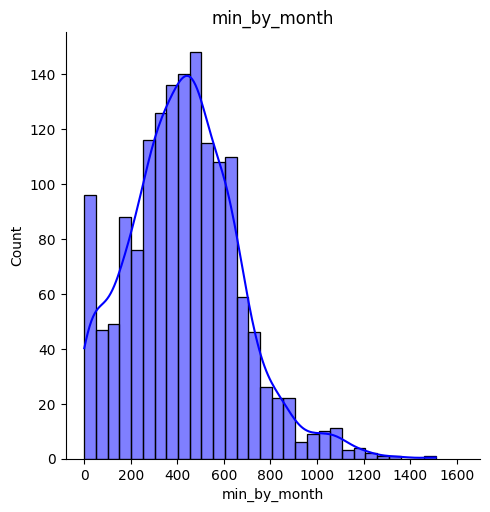

In [108]:
plot_hist(megaline_surf, 'min_by_month', color='blue', bins=30, x_axis=(-80, 1700))

In [116]:
megaline_surf['min_by_month'].describe()

count    1578.000000
mean      427.391001
std       235.318904
min         0.000000
25%       269.250000
50%       424.000000
75%       576.000000
max      1510.000000
Name: min_by_month, dtype: float64

In [117]:
megaline_surf['min_by_month'].var()

55374.986526454035

Teniendo en cuenta que este plan solo da 500 minutos al mes, observamos que los usuarios de este plan usan efectivamente en promedio 427 minutos, y que el 50 % de estos usan 424 minutos al mes. En el gráfico observamos que el pico del histograma también se aproxima a estos valores y que este tiene una asimetría positiva. Se podría decir que, en promedio, *los usuarios del plan "Surf" usan menos de lo que les proporciona su plan*.  Nuestra desviación estándar es de 235 minutos, con una varianza de 55375 (minutos al cuadrado). Esta desviación estándar no parece ser especialmente alta comparada con la media. Tenemos un mínimo de 0 minutos al mes y una gran cantidad de datos agrupados en el primer contenedor cercano a cero, lo cual resulta extraño teniendo en cuenta que eliminamos gran parte de este tipo de datos atípicos. De hecho, esto se dio debido a la unión entre tablas que hicimos, donde posiblemente muchos usuarios no tenían información en este rubro y luego los rellenamos con ceros. Para el otro extremo, a partir de los 1200 minutos los datos se hacen mucho menos frecuentes y también tienen apariencia de outliers.

Para un mejor análisis de los valores extremos, usaremos nuestros diagramas de caja para ayudarnos a delimitarlos:

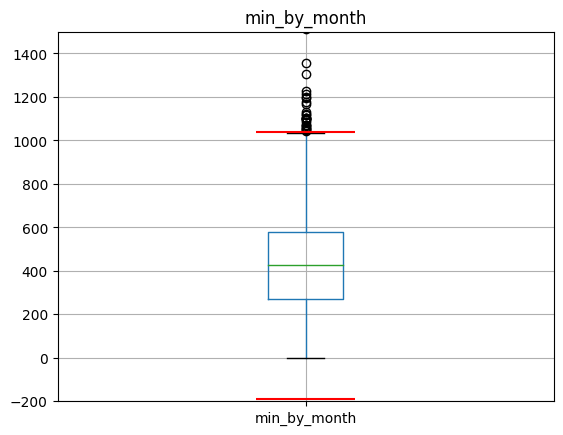

El límite superior es 1036.125
El límite superior es -190.875


In [119]:
plot_boxplot(megaline_surf, 'min_by_month', y_axis=(-200, 1500))

In [131]:
megaline_surf['min_by_month'].value_counts(normalize=True).sort_values(ascending=False).head()

0.0      0.021546
413.0    0.005070
476.0    0.004436
473.0    0.004436
626.0    0.004436
Name: min_by_month, dtype: float64

In [21]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.



In [22]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.



[Calcula la media y la variable de la duración de la llamada para concluir si los usuarios de diferentes planes muestran comportamientos distintos para sus llamadas.]

In [23]:
# Calcula la media y la varianza de la duración mensual de llamadas.


In [115]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.


[Elabora las conclusiones sobre cómo se comportan los usuarios en cuanto a las llamadas. ¿Este comportamiento es diferente entre los planes?]

### Mensajes

In [26]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan


In [27]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan


[Elabora las conclusiones sobre cómo se comportan los usuarios en cuanto a mensajes. ¿Este comportamiento es diferente entre los planes?]

### Internet

[Elabora las conclusiones sobre cómo se comportan los usuarios en cuanto a tráfico de internet. ¿Este comportamiento es diferente entre los planes?]

## Ingreso

[Del mismo modo en que has estudiado el comportamiento del usuario, es decir, estadísticamente, describe el ingreso entre los planes.]

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Probar las hipótesis estadísticas.

[Prueba las hipótesis de que es diferente el ingreso promedio de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alterna, escoge la prueba estadística, determina el valor alfa.]

In [28]:
# Prueba las hipótesis


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

[Elabora las hipótesis nula y alterna, escoge la prueba estadística, determina el valor alfa.]

In [29]:
# Prueba las hipótesis


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones importantes (suposiciones) que tomaste y que te llevaron a procesar y analizar los datos del modo en que lo hiciste.]